In [1]:
# load all required library
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import seaborn as sns
from sklearn.metrics import accuracy_score

In [2]:
# Load dataset
digits = load_digits()
print(digits.data.shape)

(1797, 64)


In [3]:
y = digits.target
X = digits.data

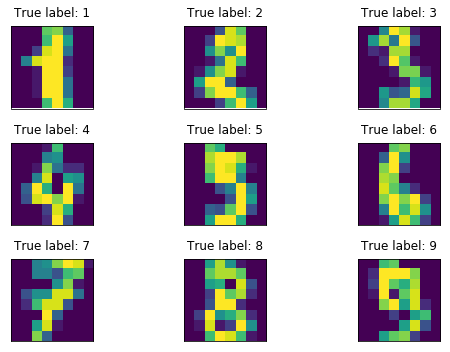

In [4]:
### Lets plot few images 
fig = plt.figure(figsize=(8, 5))
#fig.subplots_adjust()
for i in range(1,10):
    ax = fig.add_subplot(3, 3, i)
    ax.matshow(digits.images[i])
    ax.set(xticks=[], yticks=[])
    ax.set_title('True label: '+str(y[i]))

plt.tight_layout()   

## Prepare the data

In [5]:
# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.5, random_state = 0)

In [7]:
y_train.shape

(898,)

In [30]:
# standarize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Model fitting 

### Logistic regression

In [31]:
### # all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train, y_train)

/home/jyoti/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jyoti/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
# Use score method to get accuracy of model on train set
lg_score_train = logisticRegr.score(X_train, y_train)
print(f'Training set accuracy of logicstic regression model: {lg_score_train}')


Training set accuracy of logicstic regression model: 0.9944320712694877


In [33]:
lg_predictions = logisticRegr.predict(X_test)  # prediction on test set

In [34]:
lg_score_test = logisticRegr.score(X_test, y_test)
print(f'Test set accuracy of logicstic regression model: {lg_score_test}')

Test set accuracy of logicstic regression model: 0.9510567296996663


In [35]:
# confusion matrix
cm = metrics.confusion_matrix(y_test, lg_predictions)
print(cm)

[[ 89   0   0   0   0   0   0   0   0   0]
 [  0  86   2   0   0   0   1   0   1   0]
 [  1   0  91   0   0   0   0   0   0   0]
 [  0   0   2  87   0   0   0   0   2   2]
 [  0   0   0   0  75   0   0   1   0   0]
 [  0   1   0   0   0 104   1   0   0   2]
 [  0   1   0   0   1   0  87   0   0   0]
 [  0   0   0   0   1   0   0  77   0   0]
 [  0   4   3   2   1   3   2   0  73   4]
 [  0   0   0   1   0   2   0   2   1  86]]


In [36]:
## We can see from above confusion matrix that our model has difficulty in classifying label 8

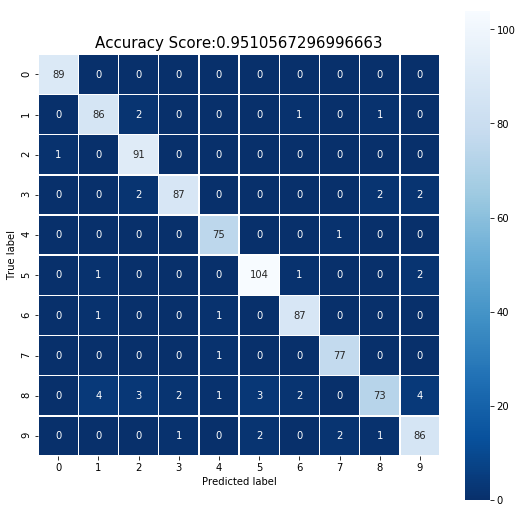

In [37]:
# using seaborn to better visualize confusion matrix 
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('True label');
plt.xlabel('Predicted label');
all_sample_title = f'Accuracy Score:{lg_score_test}'
plt.title(all_sample_title, size = 15);

### Linear regression

In [41]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [57]:
# make dataframe of true lable and predicted value for train set
y_pred_train = regressor.predict(X_train)
df_train = pd.DataFrame({'Actual': y_train, 'Predicted': y_pred_train})

In [58]:
# # make dataframe of true lable and predicted value for test set
y_pred_test = regressor.predict(X_test)
df_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_test})
df_test.head()

,Actual,Predicted
0,2,1.824268
1,8,7.872597
2,2,2.301172
3,6,6.347973
4,6,4.227003


In [59]:
print('Mean Absolute Error for test set:', metrics.mean_absolute_error(y_test, y_pred_test))  
print('Mean Squared Error for test set:', metrics.mean_squared_error(y_test, y_pred_test))  
print('Root Mean Squared Error for test set:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Mean Absolute Error for test set: 1.5288215671616847
Mean Squared Error for test set: 3.813143387249821
Root Mean Squared Error for test set: 1.9527271666184758


In [60]:
## Since, linear regression output are continious values, but our true prediction label are discrete values, we 
# are going to use some thresholding to convert continious value to discrete 

In [61]:
# First convert all the prediction which are below zero to zero and for remaining value, round up to nearest intger
def predict_transform_accuracy(df):
    df['thresholded'] = np.where(df['Predicted'] < 0, 0, df['Predicted'])
    df['thresholded']  = round(df['thresholded'])
    print(df.head())
    return accuracy_score(df.Actual, df.thresholded)


In [64]:
lin_reg_test_accuracy = predict_transform_accuracy(df_test)
print(f'The test set accuracy of regression model is {lin_reg_test_accuracy}')

   Actual  Predicted  thresholded
0       2   1.824268          2.0
1       8   7.872597          8.0
2       2   2.301172          2.0
3       6   6.347973          6.0
4       6   4.227003          4.0
The test set accuracy of regression model is 0.21245828698553948


In [65]:
lin_reg_train_accuracy = predict_transform_accuracy(df_train)
print(f'The train set accuracy of regression model is {lin_reg_train_accuracy }')

   Actual  Predicted  thresholded
0       1   2.664351          3.0
1       4   3.710619          4.0
2       9   6.876860          7.0
3       0   0.042511          0.0
4       4   4.285241          4.0
The train set accuracy of regression model is 0.25278396436525613


We see the both train and testset accuracy for linear regression is much lower than logitic regresion model.
So, we can say that mean squared error loss is not good choice for classification